## Exercise 8 - K-means clustering

- Download the dataset from [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv)
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and minfun (*minimum fundamental frequency measured across the acoustic signal*) columns. Filter data so that only forementioned columns will be included.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [2]:
voices = pd.read_csv("data_files/voice.csv")
x = voices.iloc[:,[12,13]].values
x

array([[0.08427911, 0.01570167],
       [0.10793655, 0.01582591],
       [0.09870626, 0.01565558],
       ...,
       [0.20991768, 0.03950617],
       [0.172375  , 0.03448276],
       [0.18560693, 0.06225681]])

2 Run the predictions for the data so that it will be categorised for male and female data.

In [3]:
kmeans = KMeans(n_clusters = 2, init = "random", max_iter = 100, random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

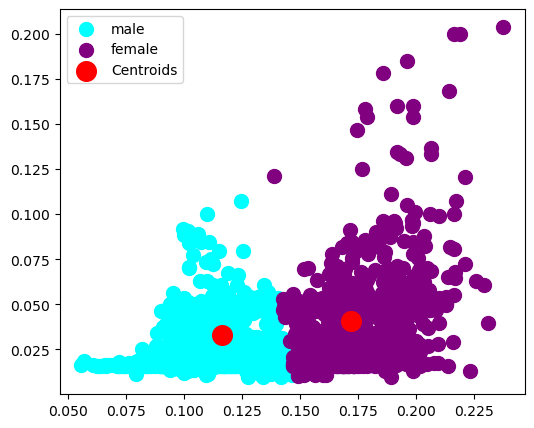

In [4]:
# Visualisation
plt.figure(figsize=(6,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'cyan', label = 'male')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'female')


# Add centroids to each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

4 Validate K-means clustering prediction results using confusion matrix.

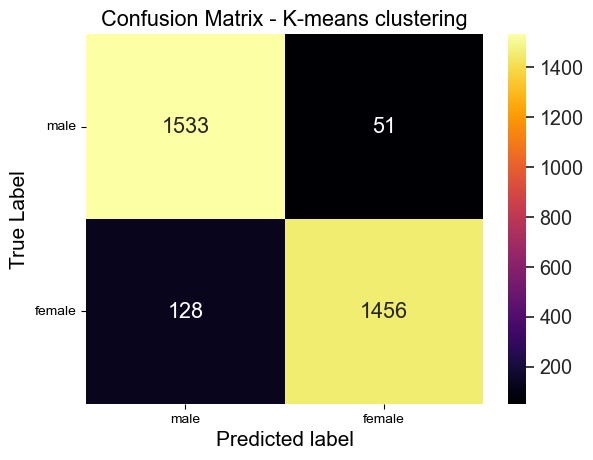

<Figure size 1000x700 with 0 Axes>

In [5]:
real = []

for i in voices["label"]:
    if i == "male":
        real.append(0)
    else:
        real.append(1)

labels = voices["label"].unique()

# Confusion matrix definition
confusion_matrix = metrics.confusion_matrix(real, y_kmeans)

# Input values for the confusion matrix
ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "inferno")

# Add descriptive title for the figure and names for axles
ax.set_title('Confusion Matrix - K-means clustering')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_xticklabels([''] + labels)
ax.set_ylabel("True Label", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()